170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


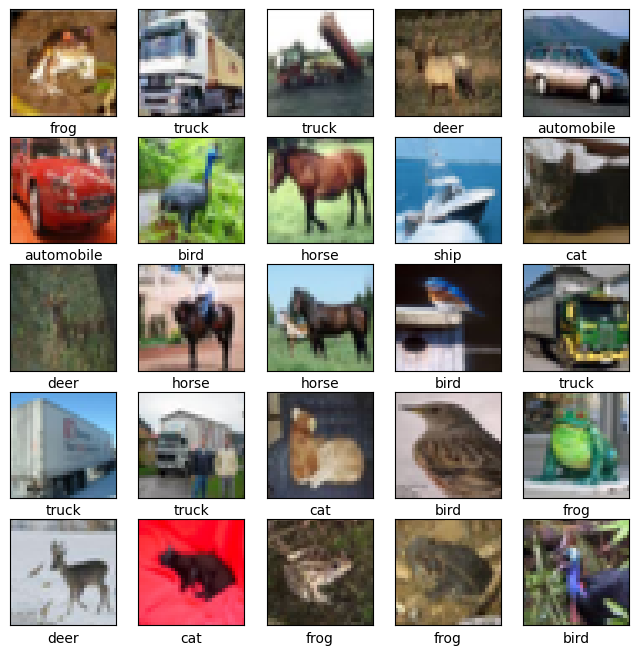

Class counts: Counter({np.uint8(6): 6000, np.uint8(9): 6000, np.uint8(4): 6000, np.uint8(1): 6000, np.uint8(2): 6000, np.uint8(7): 6000, np.uint8(8): 6000, np.uint8(3): 6000, np.uint8(5): 6000, np.uint8(0): 6000})
The CIFAR-10 dataset is balanced.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2521 - loss: 2.0360 - val_accuracy: 0.4545 - val_loss: 1.4992 - learning_rate: 0.0010
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4449 - loss: 1.5180 - val_accuracy: 0.5276 - val_loss: 1.3106 - learning_rate: 0.0010
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 1.3704 - val_accuracy: 0.5679 - val_loss: 1.2217 - learning_rate: 0.0010
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5421 - loss: 1.2779 - val_accuracy: 0.5918 - val_loss: 1.1483 - learning_rate: 0.0010
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5692 - loss: 1.2075 - val_accuracy: 0.6237 - val_loss: 1.0844 - learning_rate: 0.0010
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5854 - loss: 1.1616 - val_accuracy: 0.6437 - val_loss: 1.0411 - learning_rate: 0.0010
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6013 - loss: 1.1154 

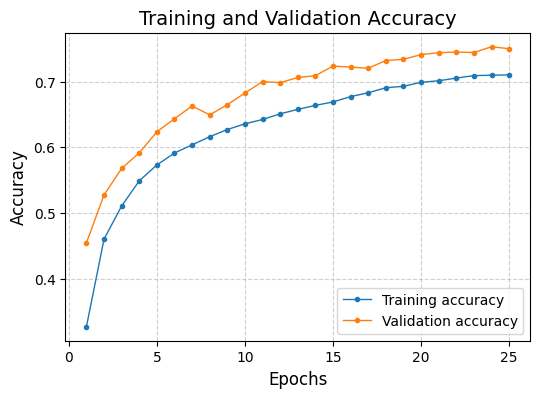

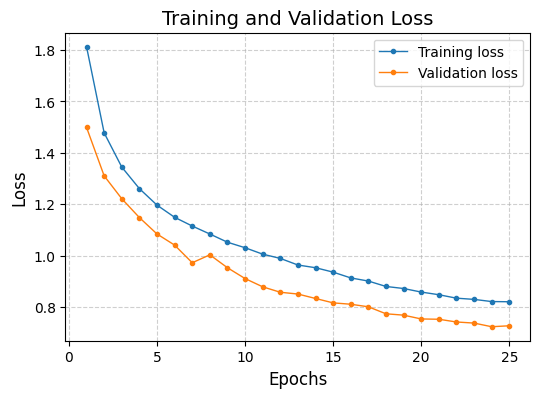

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


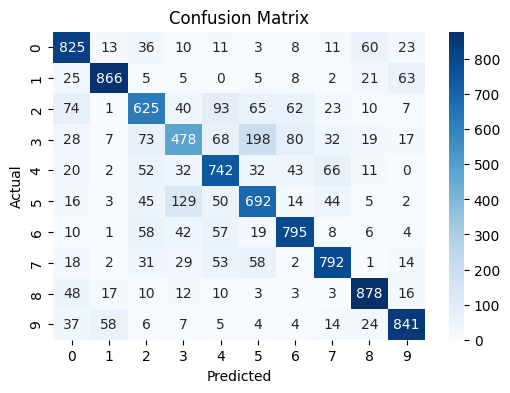

              precision    recall  f1-score   support

    airplane       0.75      0.82      0.79      1000
  automobile       0.89      0.87      0.88      1000
        bird       0.66      0.62      0.64      1000
         cat       0.61      0.48      0.54      1000
        deer       0.68      0.74      0.71      1000
         dog       0.64      0.69      0.67      1000
        frog       0.78      0.80      0.79      1000
       horse       0.80      0.79      0.79      1000
        ship       0.85      0.88      0.86      1000
       truck       0.85      0.84      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


all_labels = tf.concat([y_train, y_test], axis=0).numpy().flatten()
class_counts = Counter(all_labels)
is_balanced = len(set(class_counts.values())) == 1
print("Class counts:", class_counts)
if is_balanced:
    print("The CIFAR-10 dataset is balanced.")
else:
    print("The CIFAR-10 dataset is NOT balanced.")


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time




datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.6,#0.5
    height_shift_range=0.6,#0.5
    shear_range=0.6,#
    zoom_range=0.6,#
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

CNN = models.Sequential()
CNN.add(layers.Conv2D(65, (3, 3), padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32, 32, 3)))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.2)) #before 0.21

CNN.add(layers.Conv2D(130, (3, 3),activation='relu',kernel_initializer='he_normal',padding='same'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.2)) #before 0.21

CNN.add(layers.Conv2D(258, (3, 3),activation='relu',kernel_initializer='he_normal', padding='same'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.21)) #before 0.21

#CNN.add(layers.Flatten())
CNN.add(layers.GlobalAveragePooling2D())
#CNN.add(layers.Dense(512))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Dense(10, activation='softmax'))



CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,
                               patience=10,
                               restore_best_weights=True)

def learning_rate_scheduler(epoch, lr):
    if epoch < 15 :
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

callbacks_list = [lr_scheduler, early_stopping]

start_time = time.time()

history = CNN.fit(x_train, y_train, epochs=25, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=callbacks_list)
end_time = time.time()



test_loss, test_acc = CNN.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

import matplotlib.pyplot as plt

def plot_learning_curve(history, metric='accuracy'):

    train_metric = history.history[metric]
    val_metric = history.history[f'val_{metric}']
    epochs = range(1, len(train_metric) + 1)


    plt.figure(figsize=(6, 4))
    plt.plot(epochs, train_metric, linestyle='-', marker='.', linewidth=1, label=f'Training {metric}')
    plt.plot(epochs, val_metric, linestyle='-', marker='.', linewidth=1, label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.title()}', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric.title(), fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

y_pred_probs = CNN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

def print_per_class_accuracy(y_true, y_pred, class_names):
    print("\nPer-class accuracy:")
    for i, class_name in enumerate(class_names):
        mask = (y_true == i)
        if np.sum(mask) == 0:
            class_acc = 0.0
        else:
            class_acc = np.mean(y_pred[mask] == y_true[mask]) * 100
        print(f"{class_name}: {class_acc:.2f}%")

print_per_class_accuracy(y_true_labels, y_pred, class_names)

plot_learning_curve(history, metric='accuracy')
plot_learning_curve(history, metric='loss')

from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = CNN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_labels, y_pred, target_names=class_names))
